In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import pandas._testing as tm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from numpy.random import randn

In [5]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [6]:
con = psycopg2.connect(database="northwind",
               
                       user ='postgres',
                      password='olaronke',
                      host = '127.0.0.1',
                      port = '5432')

In [8]:
##connecting to the cursor object
cur = con.cursor(cursor_factory= psycopg2.extras.DictCursor)

# In the cell bellow, we want to know the quantity of products that is sold in each country by an employee 

In the table bellow: i created a new cloumn called peresent date, using 1-1-2021 as the default date (note that northwind database was not released on 2021), this was done in other to derived the age and year of service of the employee.

## data type error:
1. Age
2. service_year

reason: years are surposed to be in data type int.

In [9]:
## THE EMPLOYEE DATA THAT SHOWS THE AGE AND YEAR OF SERVICE WITHIN THE COMPLANY 
cur.execute("""SELECT concat(employees.last_name, ' ', employees.first_name) as Full_name, 
date_part('year', age(employees.present_date::date, employees.birth_date::date)) AS Ages, 
date_part('year', age(employees.present_date::date, employees.hire_date::date)) AS service_year,
sum(order_details.quantity) as sum_quantity, customers.country
FROM employees
JOIN orders ON orders.employee_id = employees.employee_id 
JOIN customers ON customers.customer_id = orders.customer_id
JOIN order_details ON order_details.order_id = orders.order_id
WHERE customers.country in ('USA','Portugal', 'Germany', 'Italy' )  
GROUP by customers.country,Full_name, Ages,service_year
ORDER BY sum_quantity """)




EMPLOYEES_SALES= pd.DataFrame(cur.fetchall(), columns=["Full_name","Ages", "service_year", "sum_quantity", "country"  ])

In [10]:
EMPLOYEES_SALES.head()

,Full_name,Ages,service_year,sum_quantity,country
0,Dodsworth Anne,54.0,26.0,2,Portugal
1,Suyama Michael,57.0,27.0,3,Italy
2,Leverling Janet,57.0,28.0,9,Italy
3,King Robert,60.0,26.0,18,Portugal
4,Dodsworth Anne,54.0,26.0,32,Italy


In [11]:
EMPLOYEES_SALES['country'].value_counts()

Italy       9
Germany     9
USA         9
Portugal    7
Name: country, dtype: int64

In [12]:
EMPLOYEES_SALES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Full_name     34 non-null     object 
 1   Ages          34 non-null     float64
 2   service_year  34 non-null     float64
 3   sum_quantity  34 non-null     int64  
 4   country       34 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ KB


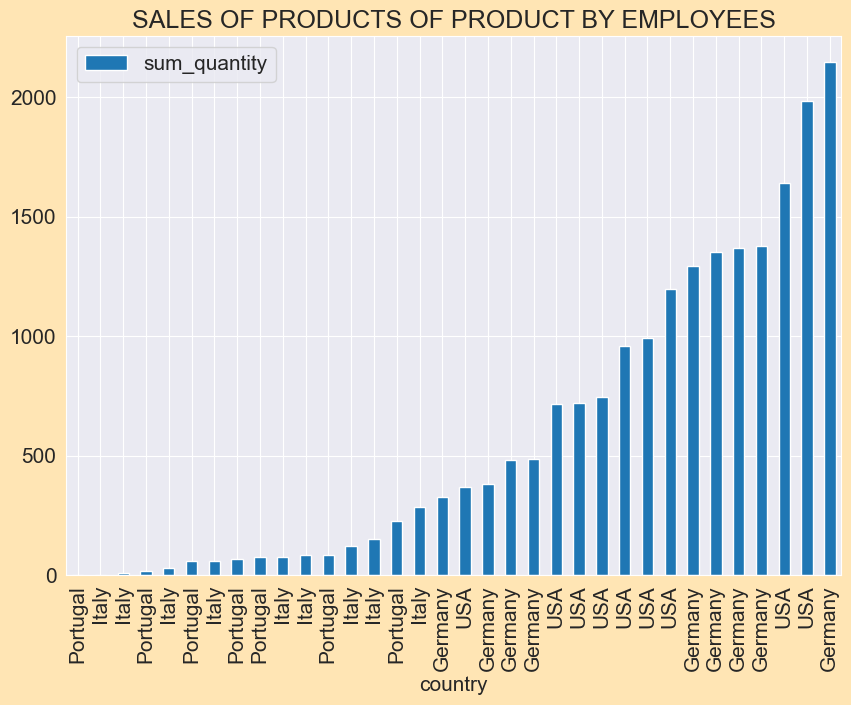

In [16]:
EMPLOYEE_CHAT = EMPLOYEES_SALES.plot.bar(y ="sum_quantity", x = "country", title = "SALES OF PRODUCTS OF PRODUCT BY EMPLOYEES")